In [1]:
options(warn=-1)

In [2]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
covid = read.csv('Book1.csv')

In [4]:
dim(covid)

[1] 348  44

In [6]:
head(covid)

Gender,Age,Income,Educational_Level,Working_condition,Nationality,Country,Home_sitatuion,Number_of_persons_living_with,Child_dependent_people,...,Fortitude_Strength_PRE,Fortitude._Strength_POST,Goodness_Strength_PRE,Goodness_Strength_POST,Intellectual_Strength_PRE,Intellectual_Strength_POST,Restraint_Strength_PRE,Restraint_Strength_POST,Interpersonal_Strength_PRE,Interpersonal_Strength_POST
Female,42,8,Master's Studies,Working,SPANISH,Spain,I live with my partner,2,No,...,5.500000,7.000000,6.8,6.4,5.333333,7.333333,7.25,6.50,6.333333,7.000000
Female,35,6,Superior (Diploma / Bachelor / Degree),Working,SPANISH,Spain,I live with my parents / father / mother,3,No,...,7.500000,3.500000,8.6,5.0,6.000000,5.333333,9.00,3.75,9.000000,4.666667
Female,28,8,Master's Studies,Working,SPANISH,Spain,I share flat,7,No,...,6.833333,5.500000,7.8,7.6,7.833333,7.833333,5.50,6.25,8.000000,7.666667
Female,49,12,Master's Studies,Working,SPANISH,Spain,I live with my partner and children (son / a),7,Yes,...,8.333333,1.000000,8.4,2.2,7.166667,1.333333,7.25,1.50,9.000000,2.333333
Female,52,1,Superior (Diploma / Bachelor / Degree),Working,SPANISH,Spain,I live with my partner and children (son / a),4,Yes,...,6.666667,5.666667,8.4,5.8,7.000000,5.666667,6.25,6.00,7.333333,6.666667
Female,36,6,Superior (Diploma / Bachelor / Degree),Another situation,SPANISH,Spain,I live with my partner,2,No,...,6.833333,8.166667,7.8,8.4,6.333333,6.833333,7.00,6.50,7.666667,7.000000


In [7]:
colnames(covid)

[1] "Gender"                              
 [2] "Age"                                 
 [3] "Income"                              
 [4] "Educational_Level"                   
 [5] "Working_condition"                   
 [6] "Nationality"                         
 [7] "Country"                             
 [8] "Home_sitatuion"                      
 [9] "Number_of_persons_living_with"       
[10] "Child_dependent_people"              
[11] "Working_condition.1"                 
[12] "Days_leaving_home_per_week"          
[13] "Reasons_to_go_out"                   
[14] "Time_out_each_week"                  
[15] "COVID19_Positive"                    
[16] "COVID19_Positive_Home"               
[17] "COVID19_Positive_people_nearby"      
[18] "GHQ_TOTAL_PRE"                       
[19] "SWL_TOTAL_PRE"                       
[20] "PMS_TOTAL_PRE"                       
[21] "POSITIVE_AFFECT_PRE"                 
[22] "NEGATIVE_AFFECT_PRE"                 
[23] "Woking_Condition_Post"               
[24] "Days_leaving_home_per_week_POST"     
[25] "Time_out_each_week_POST"             
[26] "COVID19_Positive_POST"               
[27] "COVID19_Positive_home_POST"          
[28] "COVID_19_Positive_people.nearby_POST"
[29] "GHQ_TOTAL_post"                      
[30] "SWL_TOTAL_post"                      
[31] "PMS_TOTAL_post"                      
[32] "Positive_affect_POST"                
[33] "Negative_affect_POST"                
[34] "POST_PGI._TOTAL"                     
[35] "Fortitude_Strength_PRE"              
[36] "Fortitude._Strength_POST"            
[37] "Goodness_Strength_PRE"               
[38] "Goodness_Strength_POST"              
[39] "Intellectual_Strength_PRE"           
[40] "Intellectual_Strength_POST"          
[41] "Restraint_Strength_PRE"              
[42] "Restraint_Strength_POST"             
[43] "Interpersonal_Strength_PRE"          
[44] "Interpersonal_Strength_POST"

In [8]:
attach(covid)

In [9]:
str(covid)

'data.frame':	348 obs. of  44 variables:
 $ Gender                              : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age                                 : int  42 35 28 49 52 36 24 48 30 44 ...
 $ Income                              : int  8 6 8 12 1 6 2 10 8 8 ...
 $ Educational_Level                   : Factor w/ 5 levels "Doctorate","Master's Studies",..: 2 5 2 2 5 5 2 1 2 1 ...
 $ Working_condition                   : Factor w/ 7 levels "Another situation",..: 7 7 7 7 7 1 1 7 7 7 ...
 $ Nationality                         : Factor w/ 13 levels " ARGENTINA"," Chilena.",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ Country                             : Factor w/ 1 level " Spain": 1 1 1 1 1 1 1 1 1 1 ...
 $ Home_sitatuion                      : Factor w/ 7 levels " Another situation",..: 5 4 7 6 6 5 4 6 5 6 ...
 $ Number_of_persons_living_with       : int  2 3 7 7 4 2 3 3 2 3 ...
 $ Child_dependent_people              : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 2 .

In [11]:
summary(aov(GHQ_TOTAL_PRE~Gender))

             Df Sum Sq Mean Sq F value Pr(>F)  
Gender        1    196  195.91   6.189 0.0133 *
Residuals   346  10952   31.65                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [12]:
summary(aov(GHQ_TOTAL_PRE~Educational_Level))

                   Df Sum Sq Mean Sq F value Pr(>F)
Educational_Level   4    178   44.49   1.391  0.237
Residuals         343  10970   31.98               

In [14]:
summary(aov(GHQ_TOTAL_PRE~Home_sitatuion))

                Df Sum Sq Mean Sq F value Pr(>F)
Home_sitatuion   6    233   38.81   1.213  0.299
Residuals      341  10915   32.01               

In [17]:
summary(aov(GHQ_TOTAL_PRE~Child_dependent_people))

                        Df Sum Sq Mean Sq F value Pr(>F)
Child_dependent_people   1     10   10.43   0.324   0.57
Residuals              346  11137   32.19               

In [18]:
summary(aov(GHQ_TOTAL_PRE~Working_condition.1))

                     Df Sum Sq Mean Sq F value Pr(>F)
Working_condition.1   4     57   14.30   0.442  0.778
Residuals           343  11090   32.33               

In [19]:
summary(aov(GHQ_TOTAL_PRE~Nationality))

             Df Sum Sq Mean Sq F value Pr(>F)
Nationality  12    237   19.78   0.607  0.836
Residuals   335  10910   32.57               

In [21]:
TukeyHSD(aov(GHQ_TOTAL_PRE~COVID19_Positive))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = GHQ_TOTAL_PRE ~ COVID19_Positive)

$COVID19_Positive
                   diff        lwr       upr     p adj
 NO- DOUBTS  -3.0930778  -5.119125 -1.067031 0.0010859
 YES- DOUBTS -2.4421769 -10.255339  5.370985 0.7424080
 YES- NO      0.6509009  -6.971871  8.273673 0.9779764


In [22]:
colnames(covid)

[1] "Gender"                              
 [2] "Age"                                 
 [3] "Income"                              
 [4] "Educational_Level"                   
 [5] "Working_condition"                   
 [6] "Nationality"                         
 [7] "Country"                             
 [8] "Home_sitatuion"                      
 [9] "Number_of_persons_living_with"       
[10] "Child_dependent_people"              
[11] "Working_condition.1"                 
[12] "Days_leaving_home_per_week"          
[13] "Reasons_to_go_out"                   
[14] "Time_out_each_week"                  
[15] "COVID19_Positive"                    
[16] "COVID19_Positive_Home"               
[17] "COVID19_Positive_people_nearby"      
[18] "GHQ_TOTAL_PRE"                       
[19] "SWL_TOTAL_PRE"                       
[20] "PMS_TOTAL_PRE"                       
[21] "POSITIVE_AFFECT_PRE"                 
[22] "NEGATIVE_AFFECT_PRE"                 
[23] "Woking_Condition_Post"               
[24] "Days_leaving_home_per_week_POST"     
[25] "Time_out_each_week_POST"             
[26] "COVID19_Positive_POST"               
[27] "COVID19_Positive_home_POST"          
[28] "COVID_19_Positive_people.nearby_POST"
[29] "GHQ_TOTAL_post"                      
[30] "SWL_TOTAL_post"                      
[31] "PMS_TOTAL_post"                      
[32] "Positive_affect_POST"                
[33] "Negative_affect_POST"                
[34] "POST_PGI._TOTAL"                     
[35] "Fortitude_Strength_PRE"              
[36] "Fortitude._Strength_POST"            
[37] "Goodness_Strength_PRE"               
[38] "Goodness_Strength_POST"              
[39] "Intellectual_Strength_PRE"           
[40] "Intellectual_Strength_POST"          
[41] "Restraint_Strength_PRE"              
[42] "Restraint_Strength_POST"             
[43] "Interpersonal_Strength_PRE"          
[44] "Interpersonal_Strength_POST"

In [128]:
ghq <- pivot_longer(covid,cols=c('GHQ_TOTAL_PRE', 'GHQ_TOTAL_post'), 
                         names_to="Time", values_to="GHQ_Total")

In [129]:
head(ghq)

Gender,Age,Income,Educational_Level,Working_condition,Nationality,Country,Home_sitatuion,Number_of_persons_living_with,Child_dependent_people,...,Goodness_Strength_PRE,Goodness_Strength_POST,Intellectual_Strength_PRE,Intellectual_Strength_POST,Restraint_Strength_PRE,Restraint_Strength_POST,Interpersonal_Strength_PRE,Interpersonal_Strength_POST,Time,GHQ_Total
Female,42,8,Master's Studies,Working,SPANISH,Spain,I live with my partner,2,No,...,6.8,6.4,5.333333,7.333333,7.25,6.50,6.333333,7.000000,GHQ_TOTAL_PRE,20
Female,42,8,Master's Studies,Working,SPANISH,Spain,I live with my partner,2,No,...,6.8,6.4,5.333333,7.333333,7.25,6.50,6.333333,7.000000,GHQ_TOTAL_post,19
Female,35,6,Superior (Diploma / Bachelor / Degree),Working,SPANISH,Spain,I live with my parents / father / mother,3,No,...,8.6,5.0,6.000000,5.333333,9.00,3.75,9.000000,4.666667,GHQ_TOTAL_PRE,11
Female,35,6,Superior (Diploma / Bachelor / Degree),Working,SPANISH,Spain,I live with my parents / father / mother,3,No,...,8.6,5.0,6.000000,5.333333,9.00,3.75,9.000000,4.666667,GHQ_TOTAL_post,12
Female,28,8,Master's Studies,Working,SPANISH,Spain,I share flat,7,No,...,7.8,7.6,7.833333,7.833333,5.50,6.25,8.000000,7.666667,GHQ_TOTAL_PRE,6
Female,28,8,Master's Studies,Working,SPANISH,Spain,I share flat,7,No,...,7.8,7.6,7.833333,7.833333,5.50,6.25,8.000000,7.666667,GHQ_TOTAL_post,11


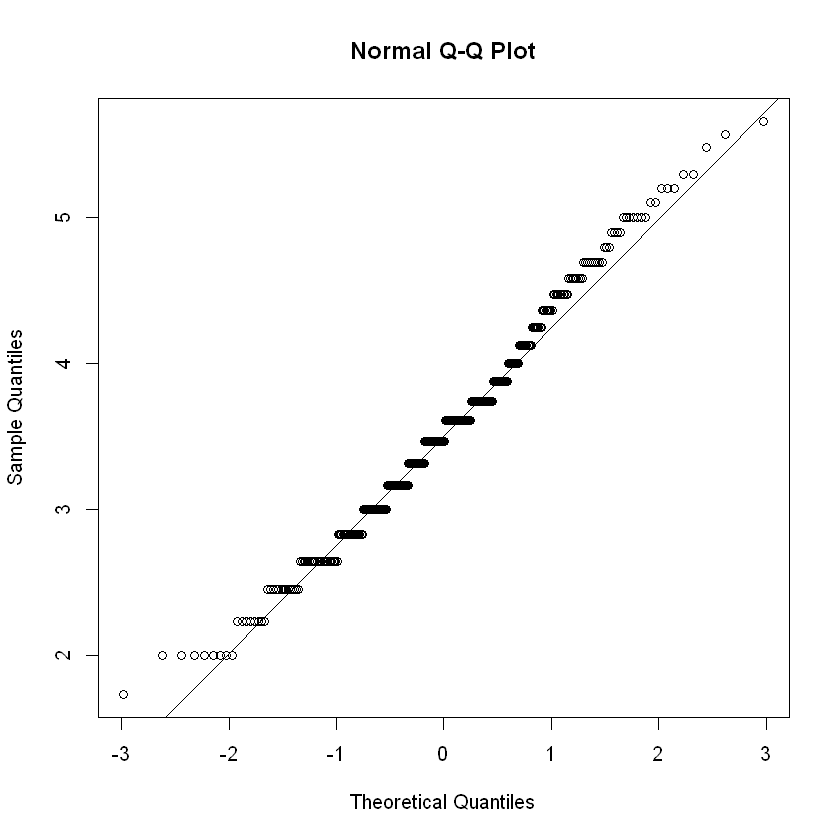

In [144]:
qqnorm(sqrt(GHQ_TOTAL_PRE))
qqline(sqrt(GHQ_TOTAL_PRE))

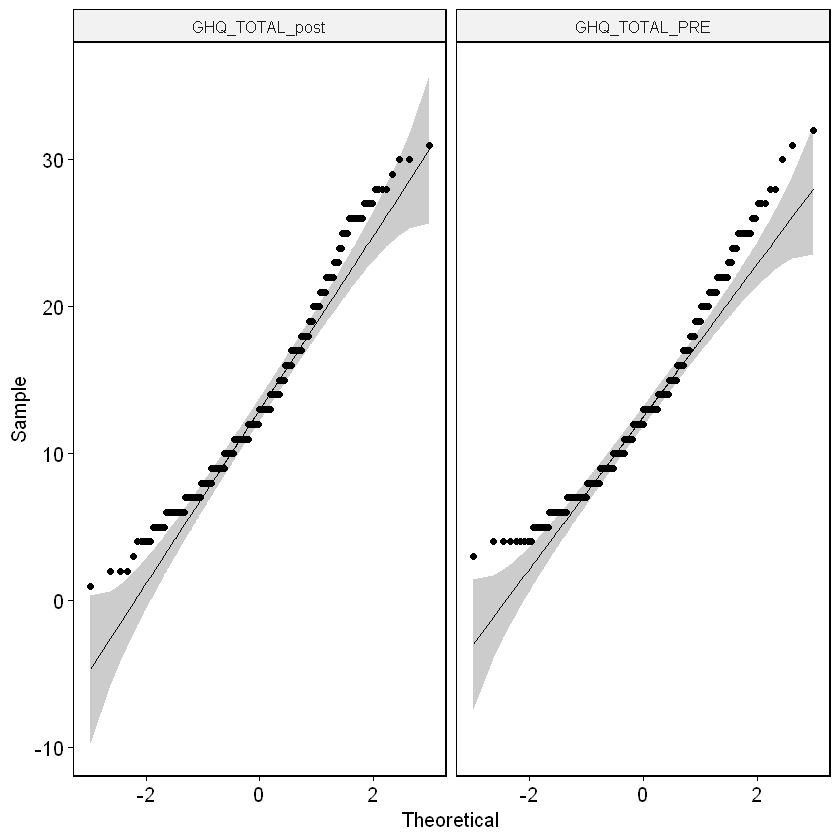

In [131]:
ggqqplot(ghq, "GHQ_Total", facet.by = "Time")

In [80]:
interpersonal <- pivot_longer(covid,cols=c('Interpersonal_Strength_PRE', 'Interpersonal_Strength_POST'), 
                         names_to="Time",values_to="Interpersonal_Strength")

In [59]:
install.packages("ggpubr")
install.packages("magrittr")

package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\khush\AppData\Local\Temp\Rtmp6bENF2\downloaded_packages


In [61]:
library(broom)

In [62]:
library(ggpubr)

In [85]:
head(interpersonal)

Gender,Age,Income,Educational_Level,Working_condition,Nationality,Country,Home_sitatuion,Number_of_persons_living_with,Child_dependent_people,...,Fortitude_Strength_PRE,Fortitude._Strength_POST,Goodness_Strength_PRE,Goodness_Strength_POST,Intellectual_Strength_PRE,Intellectual_Strength_POST,Restraint_Strength_PRE,Restraint_Strength_POST,Time,Interpersonal_Strength
Female,42,8,Master's Studies,Working,SPANISH,Spain,I live with my partner,2,No,...,5.500000,7.0,6.8,6.4,5.333333,7.333333,7.25,6.50,Interpersonal_Strength_PRE,6.333333
Female,42,8,Master's Studies,Working,SPANISH,Spain,I live with my partner,2,No,...,5.500000,7.0,6.8,6.4,5.333333,7.333333,7.25,6.50,Interpersonal_Strength_POST,7.000000
Female,35,6,Superior (Diploma / Bachelor / Degree),Working,SPANISH,Spain,I live with my parents / father / mother,3,No,...,7.500000,3.5,8.6,5.0,6.000000,5.333333,9.00,3.75,Interpersonal_Strength_PRE,9.000000
Female,35,6,Superior (Diploma / Bachelor / Degree),Working,SPANISH,Spain,I live with my parents / father / mother,3,No,...,7.500000,3.5,8.6,5.0,6.000000,5.333333,9.00,3.75,Interpersonal_Strength_POST,4.666667
Female,28,8,Master's Studies,Working,SPANISH,Spain,I share flat,7,No,...,6.833333,5.5,7.8,7.6,7.833333,7.833333,5.50,6.25,Interpersonal_Strength_PRE,8.000000
Female,28,8,Master's Studies,Working,SPANISH,Spain,I share flat,7,No,...,6.833333,5.5,7.8,7.6,7.833333,7.833333,5.50,6.25,Interpersonal_Strength_POST,7.666667


In [83]:
interpersonal$Time = as.factor(interpersonal$Time)
interpersonal$Time <- factor(interpersonal$Time, levels = c("Interpersonal_Strength_PRE", "Interpersonal_Strength_POST"))

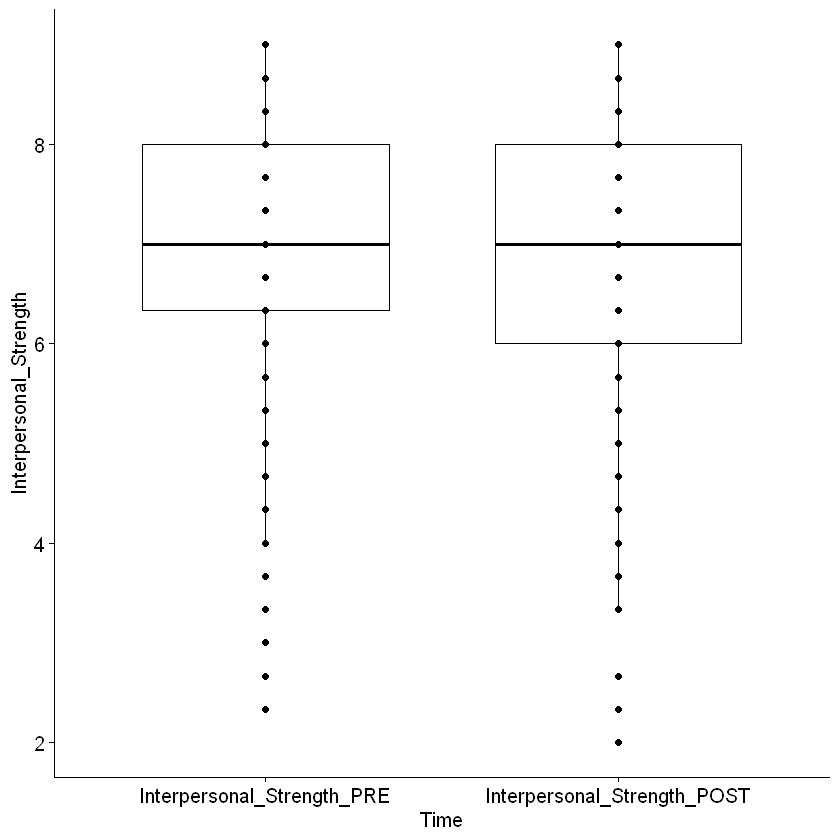

In [89]:
ggboxplot(interpersonal,x="Time",y="Interpersonal_Strength", add = "point")

In [91]:
install.packages('rstatix')

package 'rstatix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\khush\AppData\Local\Temp\Rtmp6bENF2\downloaded_packages


In [92]:
library(rstatix)


Attaching package: 'rstatix'

The following object is masked from 'package:stats':

    filter



In [101]:
interpersonal %>%group_by(Time) %>%
  shapiro_test(Interpersonal_Strength)

#There were no extreme outliers.

Time,variable,statistic,p
Interpersonal_Strength_PRE,Interpersonal_Strength,0.9574267,1.652283e-08
Interpersonal_Strength_POST,Interpersonal_Strength,0.9498257,1.681368e-09


In [127]:
shapiro.test((GHQ_TOTAL_post)^)


	Shapiro-Wilk normality test

data:  (GHQ_TOTAL_post)^1/3
W = 0.96189, p-value = 7.101e-08


In [120]:
shapiro.test((Intellectual_Strength_POST)^4)


	Shapiro-Wilk normality test

data:  (Intellectual_Strength_POST)^4
W = 0.96997, p-value = 1.307e-06


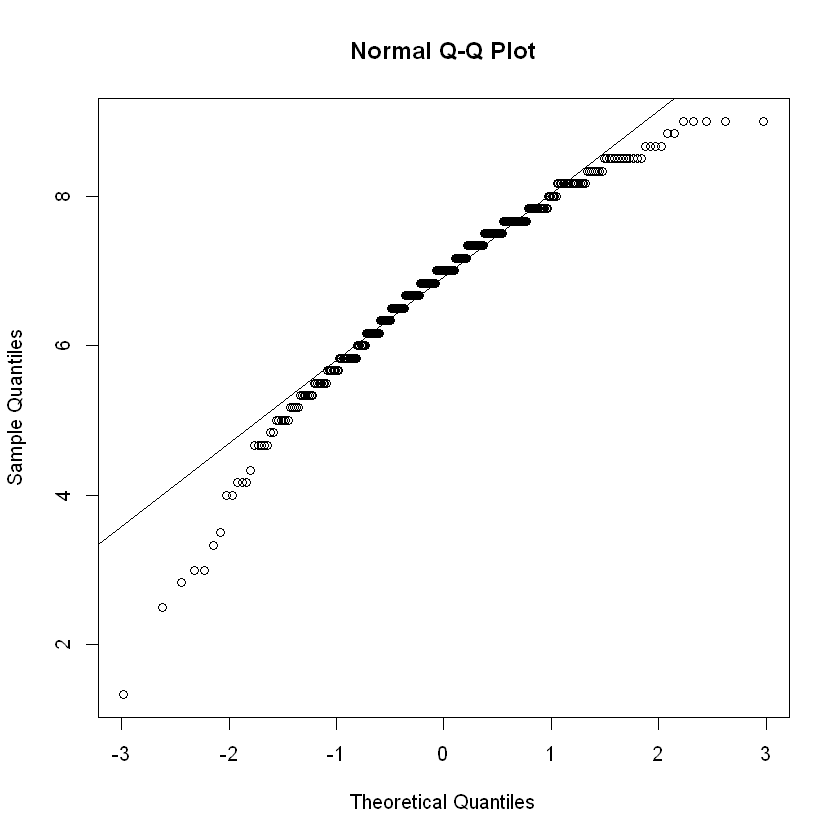

In [107]:
qqnorm(Intellectual_Strength_POST)
qqline(Intellectual_Strength_POST)

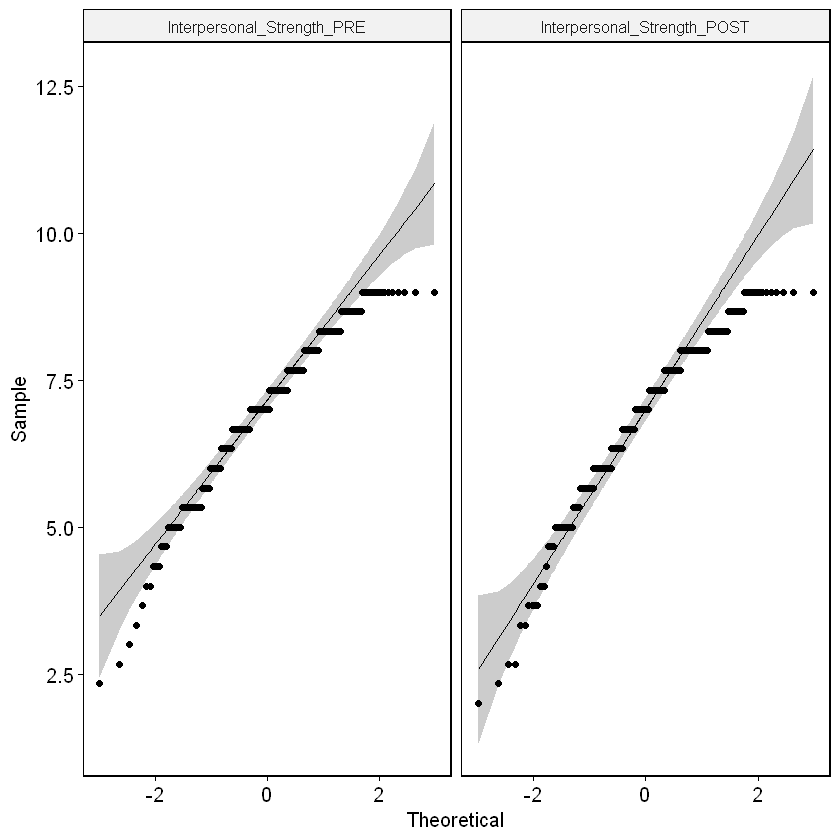

In [100]:
ggqqplot(interpersonal, "Interpersonal_Strength", facet.by = "Time")

In [ ]:
interpersonal %>%group_by(Time) %>% 

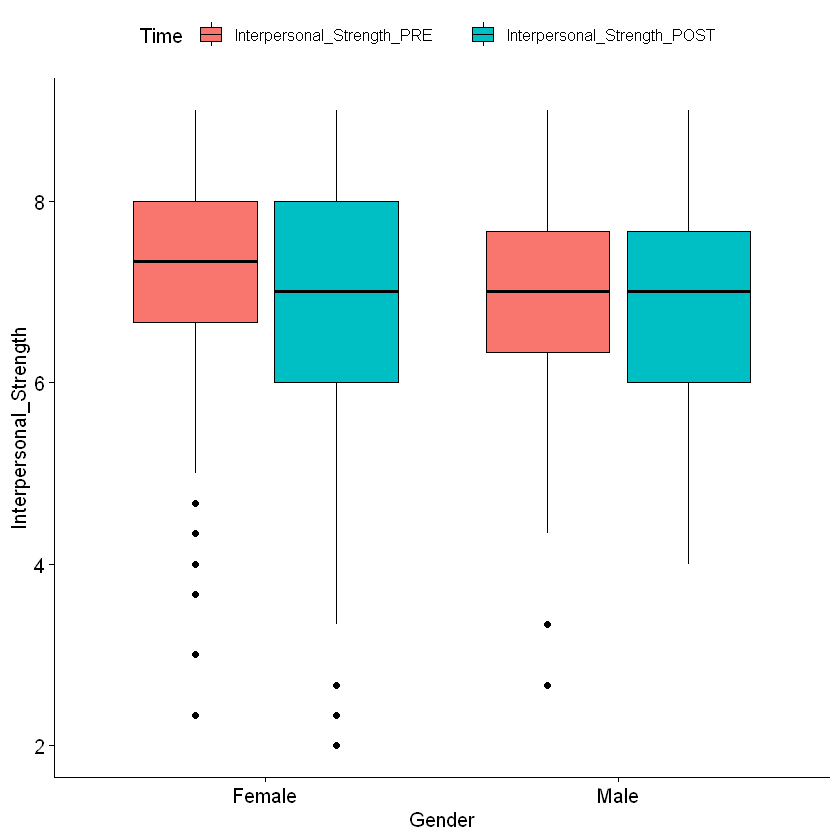

In [84]:
ggboxplot(interpersonal,x="Gender",y="Interpersonal_Strength", fill= 'Time')


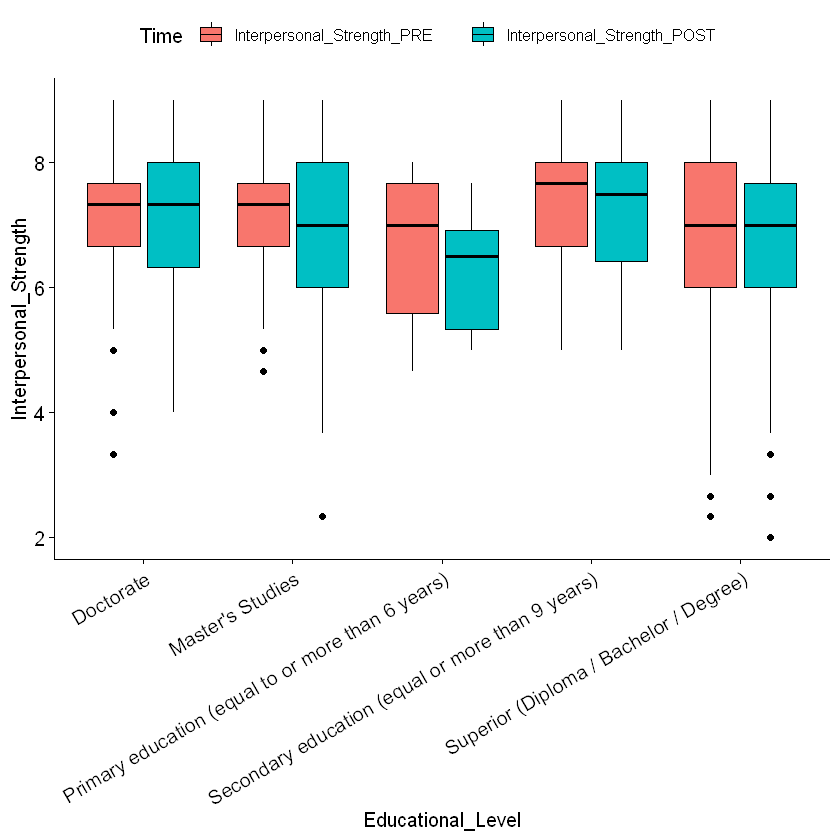

In [86]:
ggboxplot(interpersonal,x="Educational_Level",y="Interpersonal_Strength",fill="Time") +
theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust = 1))
